<a href="https://colab.research.google.com/github/hlsvalle/curso_data_science/blob/master/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Instalando o WordCloud
!pip install WordCloud -q

In [0]:
#Importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [4]:
#Importando nosso dataset
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190715155027,2019-07-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$56.00,4,30,4,4,30,30,4.0,30.0,2 days ago,t,25,55,77,332,2019-07-16,233,23,2010-07-15,2019-06-30,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20190715155027,2019-07-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,70%,NaN,f,https://a0.muscache.com/im/pictures/9e204f80-1...,https://a0.muscache.com/im/pictures/9e204f80-1...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$45.00,4,30,4,4,30,30,4.0,30.0,2 weeks ago,t,24,54,77,352,2019-07-16,232,19,2010-06-07,2019-04-27,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.09
2,31560,https://www.airbnb.com/rooms/31560,20190715155027,2019-07-16,NICE & COZY 1BDR - IPANEMA BEACH,This nice

In [6]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               66
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16472
Length: 106, dtype: int64

In [8]:
df.summary.isnull().sum()

1747

In [9]:
df.summary.head()

0    Please note that special rates apply for Carni...
1    Our apartment is a little gem, everyone loves ...
2    This nice and clean 1 bedroom apartment is loc...
3    This cosy apartment  is just a few steps away ...
4    Our newly renovated studio is located in the b...
Name: summary, dtype: object

In [0]:
#Eliminar linhas da coluna summary com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

In [11]:
df.summary.isnull().sum()

1747

In [0]:
#Concatenar todas as palavras
all_summary = " ".join(s for s in summary)

In [15]:
#Quantidade de palavras
print("Quantidade de palavras: {}".format(len(all_summary)))

Quantidade de palavras: 9823645


In [0]:
#Criando lista de STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
#Gerando uma WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(all_summary)

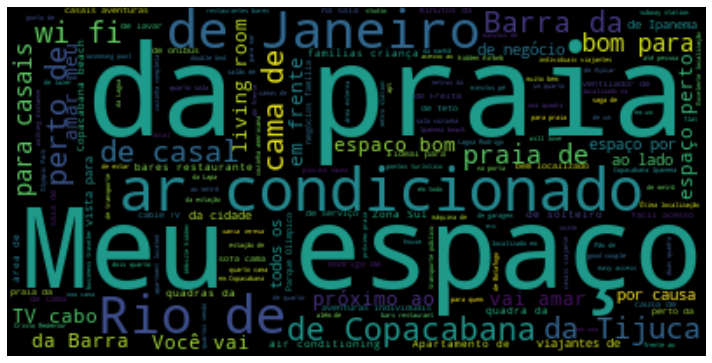

In [21]:
#Plotando WordCloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.tight_layout()

In [0]:
#Removendo algumas palavras da WordCloud
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

In [0]:
#Gerar uma nova WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=1600, height=800).generate(all_summary)

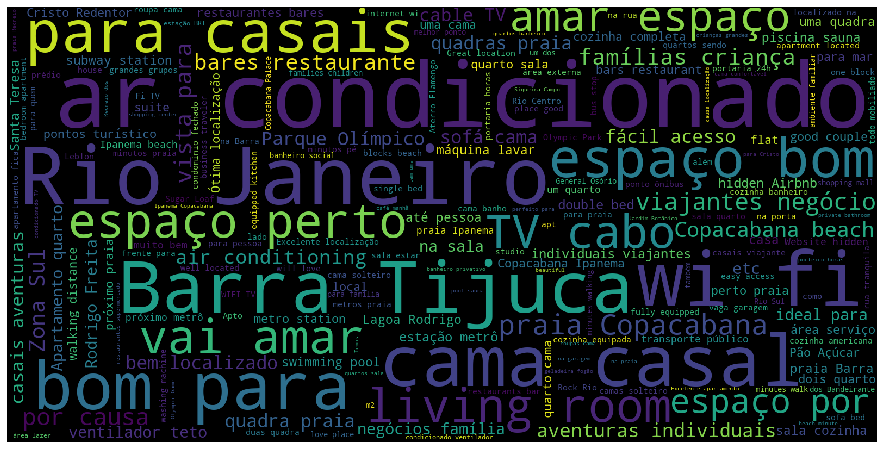

In [27]:
#Plotar a nova WordCloud
fig, ax = plt.subplots(figsize=(16,8))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file('wordcloud_airbnb_riodejaneiro.png')

# New Section